In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import tensorflow as tf
tf.keras.backend.set_learning_phase(1)
from PIL import Image
from keras import backend as K 
import matplotlib.pyplot as plt
import os, sys, random, gc

from src import exploration
from src import pre_process
from src import denseNet
from src import efficientNet
from sklearn.model_selection import train_test_split

All .tiff images are stained with `Martius Scarlet Blue (MSB) stain`. The two major acute ischemic stroke (AIS) etiology subtypes and their main cellular differences are:

1. **Cardio Embolism (CE):** RBCs=47.67%, WBCs=4.22%, F= 29.19%, P=18.21%

2. **Artery Atherosclerosis (AA):** RBCs=42.58%, WBCs=3.12%, F=31.31%, P=20.81%


<font size="1,5"> [Abbasi M, Fitzgerald S, Ayers-Ringler J, Espina V, Mueller C, Rucker S, Kadirvel R, Kallmes D, Brinjikji W. Proteomic Analysis of Cardioembolic and Large Artery Atherosclerotic Clots Using Reverse Phase Protein Array Technology Reveals Key Cellular Interactions Within Clot Microenvironments. Cureus. 2021 Feb 22;13(2):e13499. doi: 10.7759/cureus.13499. PMID: 33777584; PMCID: PMC7990677.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7990677/)</font>

Given this insight, we can maintain the distinct colors in the images since each cellular subtype is stained differently. Rather than preserving every pixel, we can reduce their size to enhance the efficiency of the neural network (NN) processing.

![CE](/images/CEexample1.png)

`Split dataset into train and valid:`

In [15]:
train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

In [16]:
train_x['label'].value_counts() / len(train_x.label)

label
CE     0.72471
LAA    0.27529
Name: count, dtype: float64

In [17]:
train2 = exploration.Labeling_images(train_x)
train3 = train2.class_again_train()
train3.sample(1)

,image_id,center_id,patient_id,image_num,label,new_file_path
196,41b4ea_0,7,41b4ea,0,LAA,D:/bootcamp/original/train_folder/41b4ea_0.tif


In [18]:
valid_x['label'].value_counts() / len(valid_x.label)

label
CE     0.728477
LAA    0.271523
Name: count, dtype: float64

In [19]:
val = exploration.Labeling_images(valid_x)
val2 = val.class_again_val()
val2.sample(1)

,image_id,center_id,patient_id,image_num,label,new_file_path
383,81092a_0,11,81092a,0,CE,D:/bootcamp/original/val_folder1/81092a_0.tif


In [20]:
train3.to_csv("../Final-IRONHACK-Project/data/train_xdef.csv", index = False)

In [21]:
val2.to_csv("../Final-IRONHACK-Project/data/valid_xdef.csv", index = False)

In [22]:
data_path = "D:/bootcamp/original/"
folder_names= ["train_folder", "val_folder1"]
pre_process.createfolders(data_path,folder_names)

Folder train_folder already exists at: D:/bootcamp/original/train_folder
Folder val_folder1 already exists at: D:/bootcamp/original/val_folder1


In [23]:
# Just run it once because it moves permanently
    # train_x move img to train_folder
# train_path = "D:/bootcamp/original/train_folder/"
# valid_path = "D:/bootcamp/original/val_folder1/"
# pre_process.move_images(train_x, train_path)
# pre_process.move_images(valid_x, valid_path)

In [24]:
# For training folder
data_path = "D:/bootcamp/original/train_folder/"
folder_names= ["CE", "LAA"]
pre_process.createsubfolders(data_path,folder_names)

Folder CE already exists at: D:/bootcamp/original/train_folder/CE
Folder LAA already exists at: D:/bootcamp/original/train_folder/LAA


In [25]:
# For validation folder
data_path = "D:/bootcamp/original/val_folder1/"
folder_names= ["CE", "LAA"]
pre_process.createsubfolders(data_path,folder_names)

Folder CE already exists at: D:/bootcamp/original/val_folder1/CE
Folder LAA already exists at: D:/bootcamp/original/val_folder1/LAA


In [26]:
# Just run it once because it moves permanently
    #  For the train folder
# folder_path_CE = "D:/bootcamp/original/train_folder/CE/"
# folder_path_LAA = "D:/bootcamp/original/train_folder/LAA/"
# pre_process.images_class(train3, folder_path_CE, folder_path_LAA)

In [27]:
# Just run it once because it moves permanently
    # For the validation folder
# folder_path_CE = "D:/bootcamp/original/val_folder1/CE/"
# folder_path_LAA = "D:/bootcamp/original/val_folder1/LAA/"
# pre_process.images_class(val2, folder_path_CE, folder_path_LAA)

In [28]:
# So I can plot all images regardless of the amount of pixels:
Image.MAX_IMAGE_PIXELS = 3000000000 
K.set_learning_phase(1)

# nb_train_samples = 2  
# nb_validation_samples = 4  

n_classes = 2 

In [29]:
img_width, img_height = 224,224 
epochs = 25  #Number of times the algorithm is learning
batch_size = 20  #Number of training examples used in each iteration
train_dir = "D:/bootcamp/original/train_folder/"
val_dir = "D:/bootcamp/original/val_folder1/"
train_generator, test_generator = pre_process.image_generator(train_dir, val_dir,img_width, img_height, batch_size)

Found 603 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


`DenseNet model:`

In [30]:
n_classes = 2
dense_model = denseNet.DenseNet_model()
epochs = 25
architecture = dense_model.densenet_model(train_generator, test_generator, 150, 150, epochs)
architecture.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [31]:
# neuralnets.plot_neural_network(arch)

In [32]:
comp = dense_model.compile_model()

In [33]:
hist = dense_model.train(train_generator, test_generator, epochs = 25)

Epoch 1/25


31/31 [==============================] - 6022s 193s/step - loss: 0.8379 - accuracy: 0.6866 - lr: 0.0010
Epoch 2/25
31/31 [==============================] - 6149s 199s/step - loss: 0.5989 - accuracy: 0.7247 - lr: 0.0010
Epoch 3/25
16/31 [==============>...............] - ETA: 49:18 - loss: 0.6089 - accuracy: 0.7063

In [ ]:
weigths = dense_model.get_weights()

In [ ]:
class_names = ["CE", "LAA"]
batch_size = 20
verbose = 1
# eval = dense_model.evaluation(test_generator, class_names, batch_size)

1/1 [==============================] - 0s 97ms/step


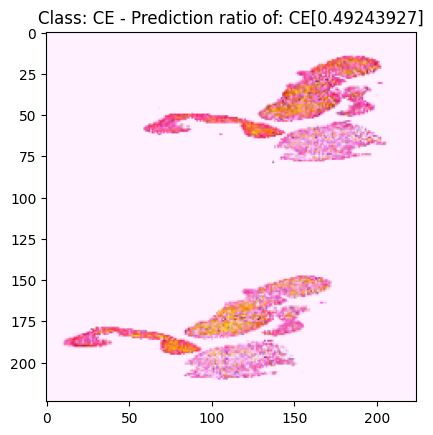

In [ ]:
DenseNet = dense_model.predict_densenet(test_generator,class_names)

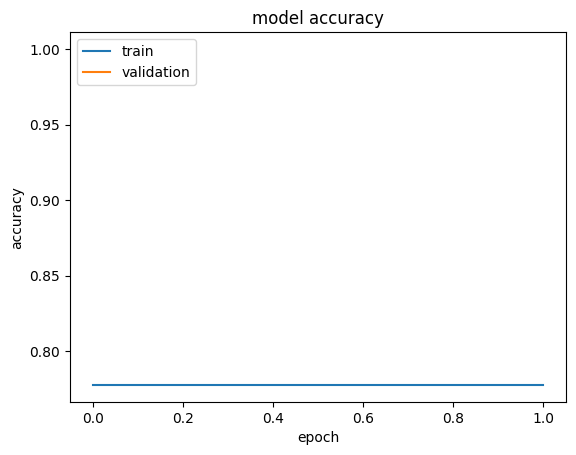

In [ ]:
def plot_hist(hist): 
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

`EfficientNet model:`

In [ ]:
efficient_model = efficientNet.EfficientNet()

architecture = efficient_model.efficient_model()
architecture.summary()



Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 3)          0         ['normalization_1

In [ ]:
compB0 = efficient_model.compile_model()

In [ ]:
hist = efficient_model.train(train_generator, test_generator, epochs = 25)

Epoch 1/2


3/3 - 115s - loss: 0.5637 - accuracy: 0.6667 - val_loss: 0.1584 - val_accuracy: 1.0000 - 115s/epoch - 38s/step
Epoch 2/2
3/3 - 109s - loss: 0.7669 - accuracy: 0.7778 - val_loss: 0.0605 - val_accuracy: 1.0000 - 109s/epoch - 36s/step


In [ ]:
efficient_model.get_weights()

1/1 [==============================] - 1s 1s/step


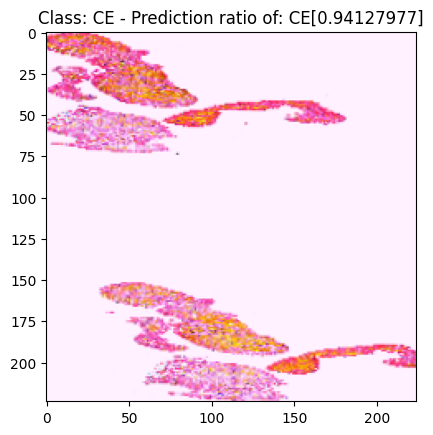

In [ ]:
class_names = ["CE", "LAA"]
efficient_model.predict_efficientNet(test_generator,class_names)

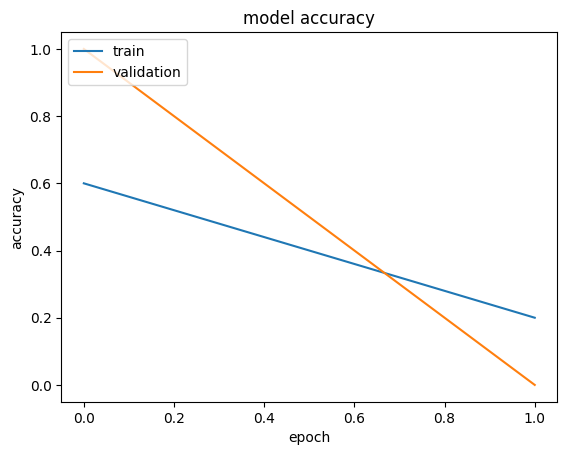

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
#validation_metrics = efficient_model.evaluate(test_generator)

AttributeError: 'EfficientNet' object has no attribute 'evaluate'

In [ ]:
# efficient_model.unfreeze_model(hist)

#https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/